In [2]:
from pandas import read_csv

from numpy import vstack, hstack
from numpy.random import seed

from matplotlib.pyplot import subplots

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Read Proteomics Data

Protein concentrations in blood serum were obtained from mass spectrometry for 216 subjects. 

121 with ovarian cancer, 95 controls. 

4000 peptides and proteins were recorded.

Data from
https://home.ccr.cancer.gov/ncifdaproteomics/ppatterns.asp


In [3]:
df = read_csv('ovarian.txt', header=None)

labels = read_csv('ovarian_group.txt', header=None)

print(len(df), len(df.columns))


216 4000


## Convert to Numpy Array

In [8]:
X = df.to_numpy()

y = (labels.to_numpy()).ravel()

X.shape, y.shape


((216, 4000), (216,))

The data has 216 rows and 4000 columns.

# Classification


## Create Train and Test Data

We use `train_test_split` to create train and test data.


In [13]:
RANDOM_SEED1 = 1234

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, 
                                                    random_state=RANDOM_SEED1)

print(X_train.shape, X_test.shape)


(108, 4000) (108, 4000)


Train and test data include 108 subjects and their corresponding labels.

## Fit and Predict

In [14]:
RANDOM_SEED2 = 999

clf = RandomForestClassifier(random_state=RANDOM_SEED2)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluating the score using test data:
score = clf.score(X_test, y_test)

print(round(score, 2))


0.91


With a comparatively low number of subjects, the random forest algorithms achieves a good prediction score.


## Feature Importances

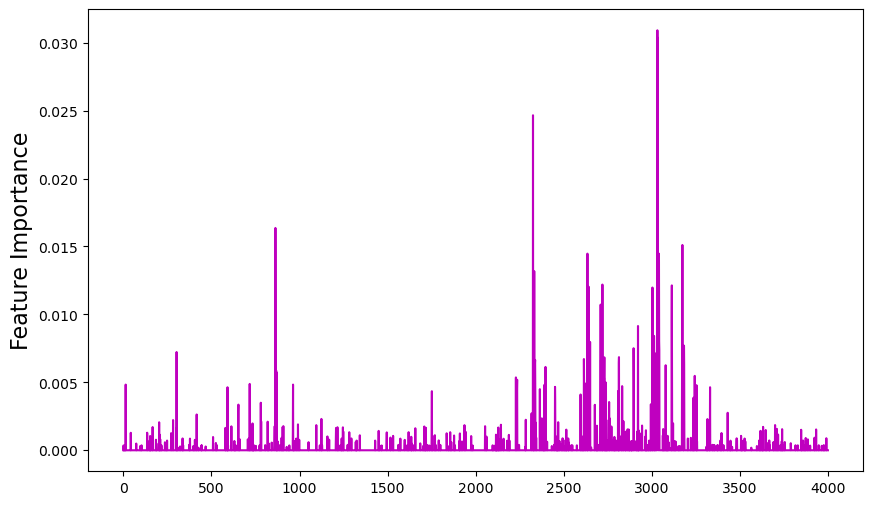

In [15]:
importances = clf.feature_importances_

fig, ax = subplots(figsize=(10,6))

ax.plot(importances, color=('m'));

ax.set_ylabel('Feature Importance', fontsize=16);


In [17]:
sum(importances)

0.9999999999999999

The importances show that some protein concentrations dominate the outcome. Overall, however, there is a broad distribution suggesting that a large number of  protein concentrations are required for successful prediction. 


In [18]:
# Number of importances above threshold and their sum

importance_threshold = 0.005

print('Number:', sum(importances > importance_threshold), 
      '   Sum:', sum(importances[importances > importance_threshold]))


Number: 56    Sum: 0.5316486365699314


This shows the number of proteins above the threshold and their importances sum. E.g. 56 proteins account for about half of the classification success.

This suggests that only a combination of a considerable numner of protein concentrations is able to distinguish controls and patients. 
